<a href="https://colab.research.google.com/github/DuplamenteH/Ds/blob/master/SeriesTemporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisando vendas 1

In [0]:
path ="drive/My Drive/DadosAlura/time series/"
import pandas as pd


In [2]:
alucar = pd.read_csv(path+"alucar.csv")
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
alucar.describe()

,vendas
count,24.000000
mean,287.875000
std,222.151204
min,10.000000
25%,96.000000
50%,245.500000
75%,450.750000
max,721.000000


In [4]:
alucar.shape


(24, 2)

In [5]:
alucar.isna().sum().sum()


0

In [6]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [7]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [8]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [9]:
!pip install seaborn==0.10.1

In [10]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

Text(0, 0.5, 'Valor')

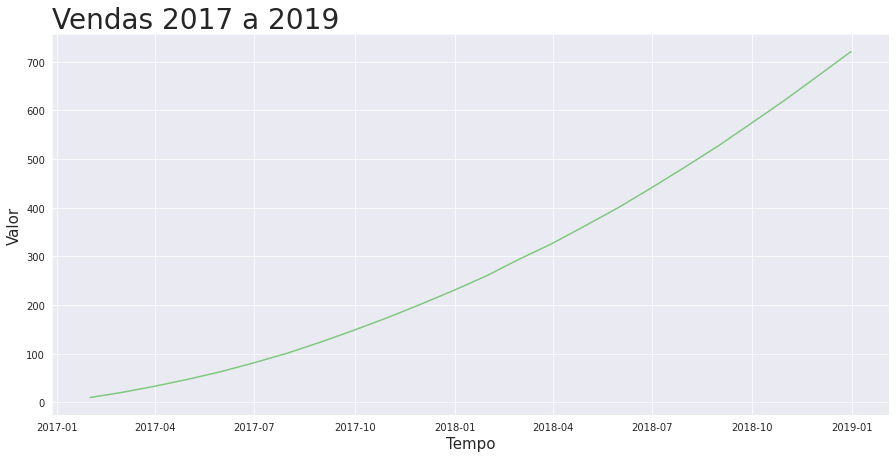

In [12]:
ax = sns.lineplot(x='mes',y='vendas',data=alucar)
ax.figure.set_size_inches(15,7)
ax.set_title('Vendas 2017 a 2019',loc='left',fontsize = 28)
ax.set_xlabel('Tempo',fontsize= 15)
ax.set_ylabel('Valor',fontsize= 15)

##Decomposição de vendas

In [13]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


In [0]:
def plotar (titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(18,9)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

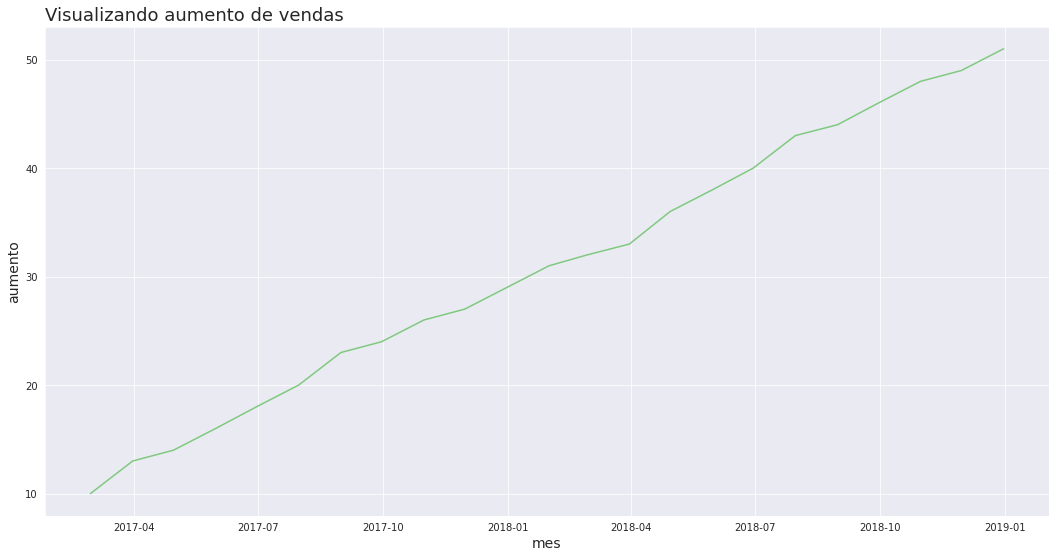

In [15]:
plotar("Visualizando aumento de vendas",'mes','aumento','mes','aumento',alucar)

In [16]:
alucar['aceleração'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleração
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


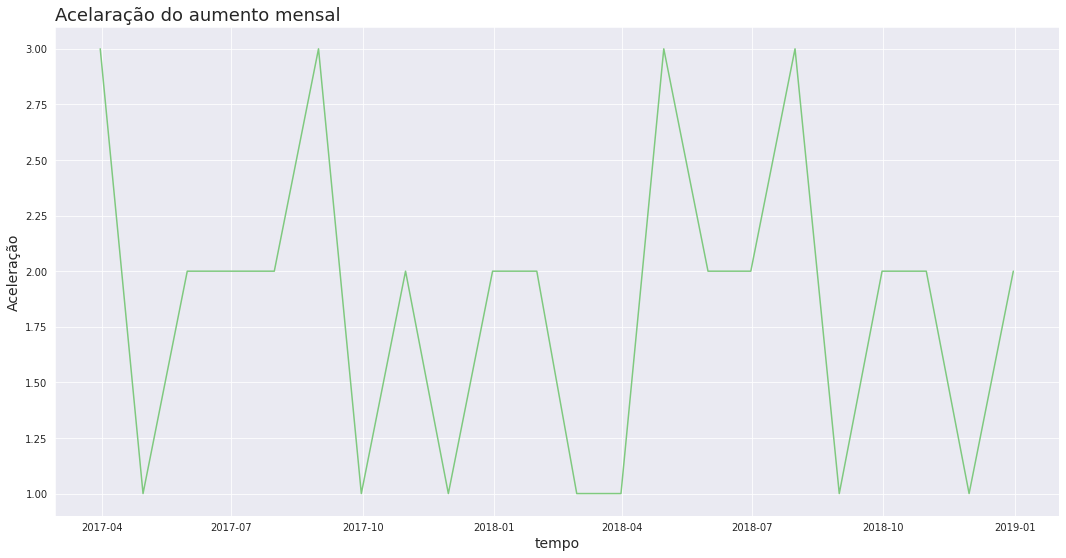

In [17]:
plotar("Acelaração do aumento mensal","tempo","Aceleração",'mes','aceleração',alucar)

##Plotando tudo

In [0]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(20,16))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18, loc='center')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax

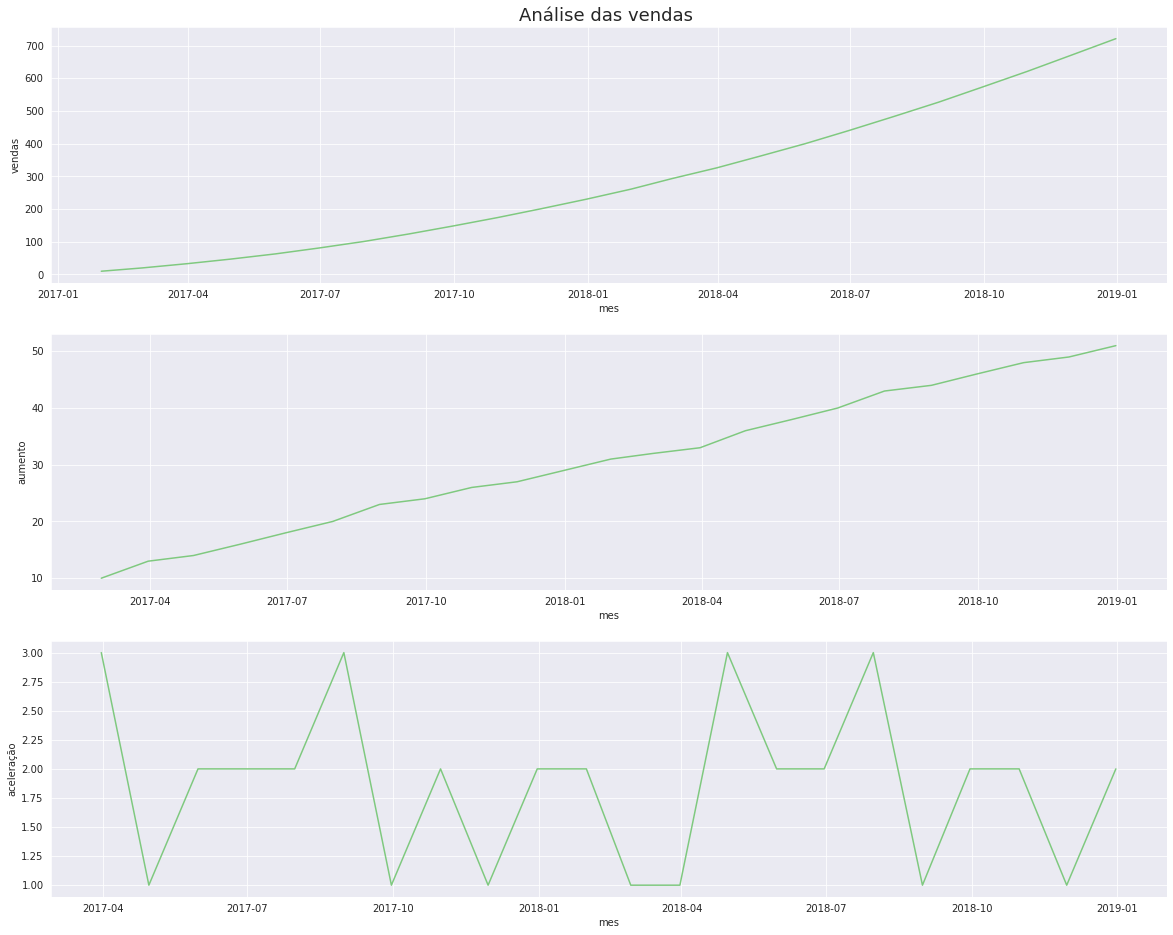

In [19]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleração',
                alucar, 'Análise das vendas ') 

##Autocorrelação

In [0]:
from pandas.plotting import autocorrelation_plot

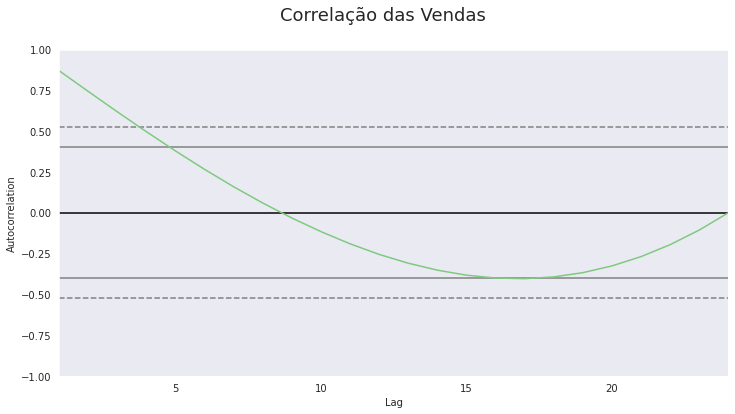

In [21]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas',fontsize=18)
autocorrelation_plot(alucar['vendas'])
ax=ax

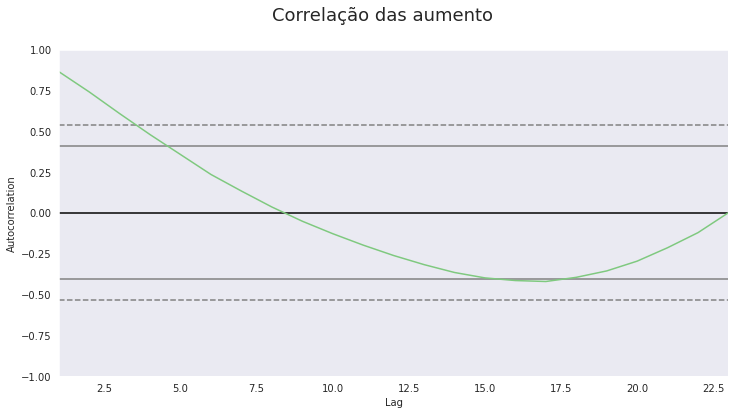

In [22]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das aumento',fontsize=18)
autocorrelation_plot(alucar['aumento'][1:])
ax=ax

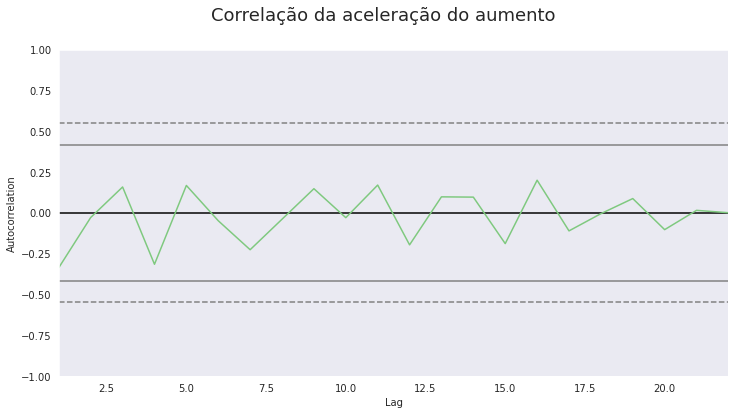

In [23]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração do aumento',fontsize=18)
autocorrelation_plot(alucar['aceleração'][2:])
ax=ax

##Analisando assinantes da newsletter

In [24]:
dataNew = pd.read_csv(path+'newsletter_alucar.csv') 
dataNew.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [25]:
print('Quantidade de linhas e colunas', dataNew.shape)
print('Quantidade de dados nulos', dataNew.isna().sum().sum())

Quantidade de linhas e colunas (24, 2)
Quantidade de dados nulos 0


In [0]:
dataNew['mes'] = pd.to_datetime(dataNew['mes'])

In [27]:
dataNew['aumento'] = dataNew['assinantes'].diff()
dataNew['aceleracao'] = dataNew['aumento'].diff()
dataNew.head(10)

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0
5,2017-06-30,66,17.0,2.0
6,2017-07-31,85,19.0,2.0
7,2017-08-31,107,22.0,3.0
8,2017-09-30,132,25.0,3.0
9,2017-10-31,160,28.0,3.0


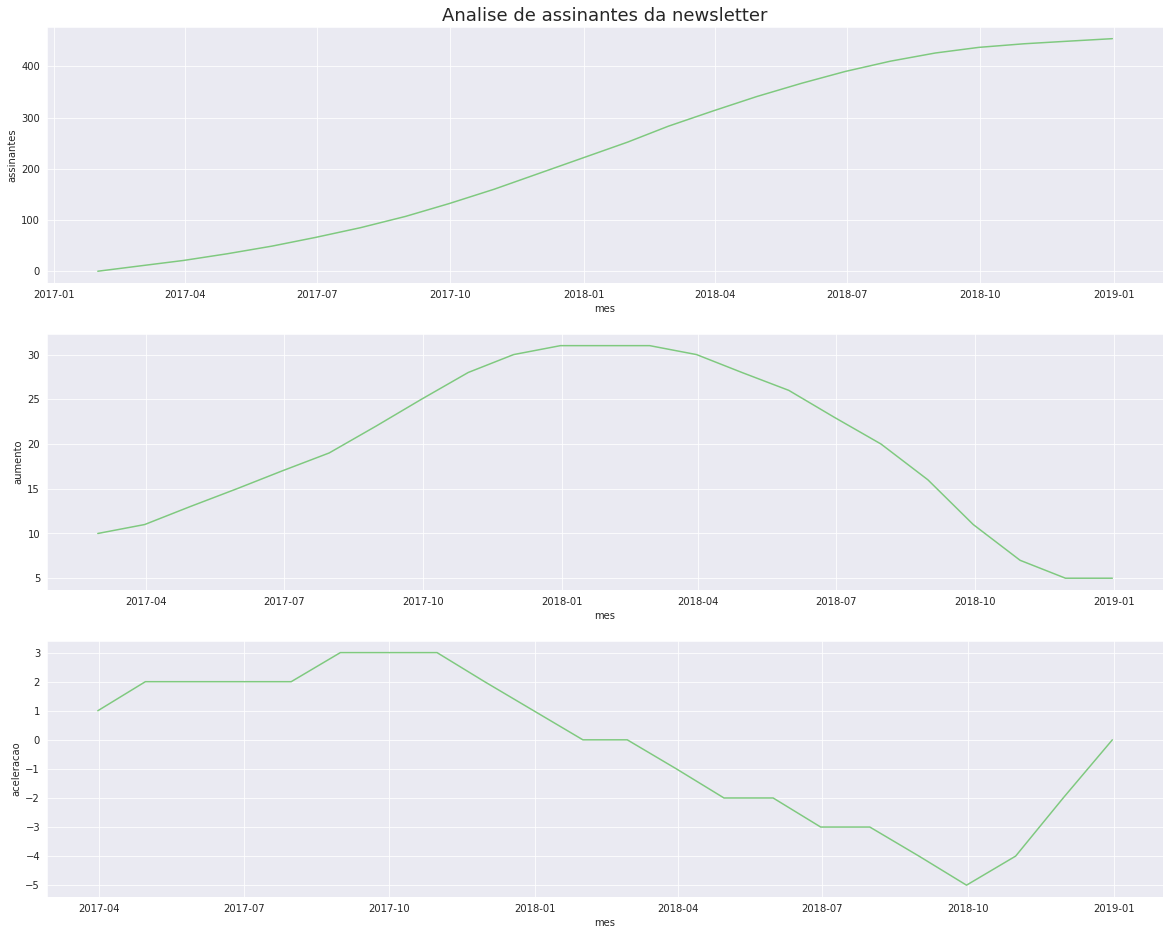

In [28]:
plot_comparacao('mes','assinantes','aumento','aceleracao',dataNew,"Analise de assinantes da newsletter")

#Analise da Chocoloteu

In [0]:
choco = pd.read_csv(path+'chocolura.csv')

In [30]:
choco.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [31]:
print ('Quantidade de linhas:', choco.shape)
print ('Quantidade de dados nulos :', choco.isna().sum().sum())

Quantidade de linhas: (24, 2)
Quantidade de dados nulos : 0


In [0]:
choco['mes']= pd.to_datetime(choco['mes'])

In [0]:
choco['aumento'] = choco['vendas'].diff()
choco['aceleracao'] = choco['aumento'].diff()

In [34]:
choco.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


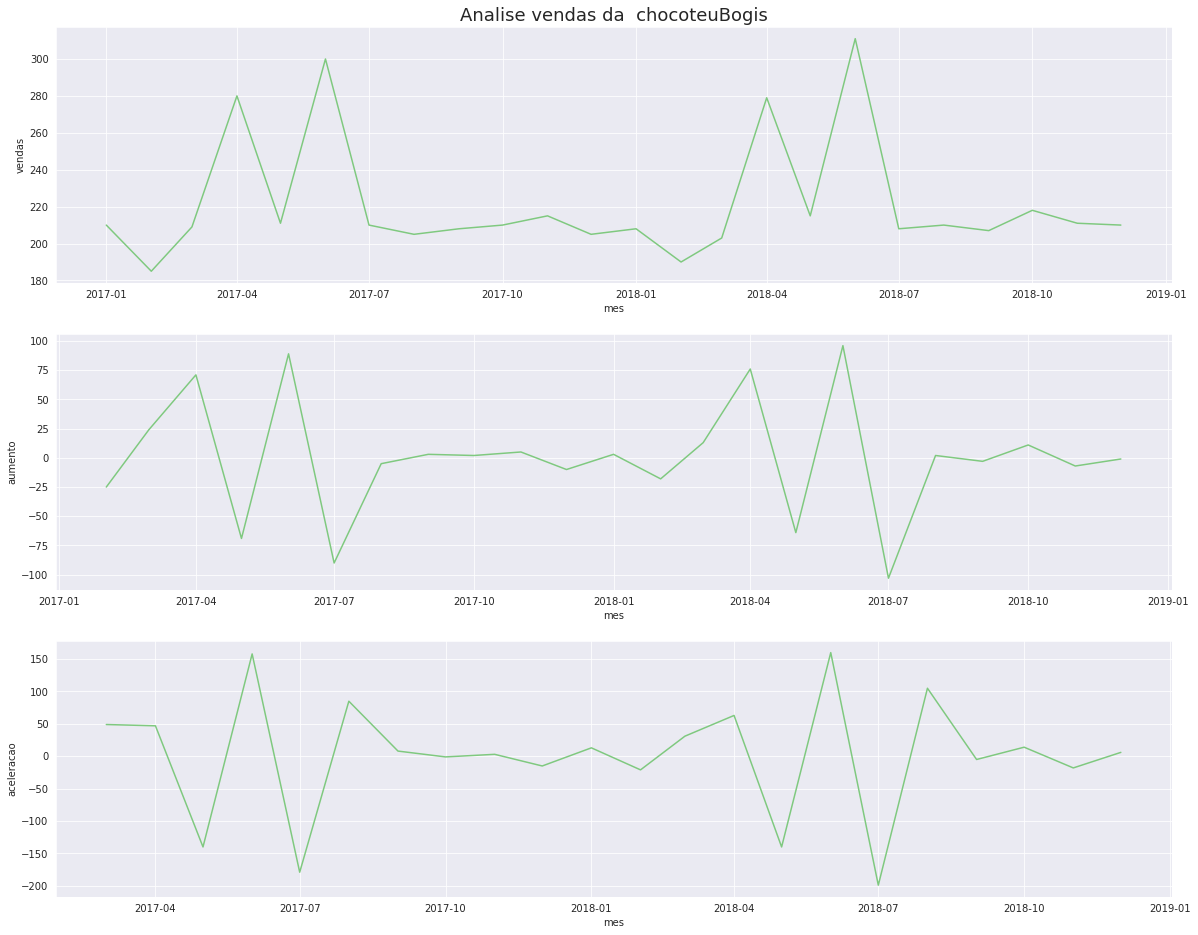

In [35]:
plot_comparacao('mes','vendas','aumento','aceleracao',choco,"Analise vendas da  chocoteuBogis")

##Analisando lojas específicas

In [36]:
vendas_por_dia = pd.read_csv(path+'vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [37]:
print ('Quantidade de linhas:',vendas_por_dia.shape)
print ('Quantidade de dados nulos :', vendas_por_dia.isna().sum().sum())

Quantidade de linhas: (61, 2)
Quantidade de dados nulos : 0


In [0]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])

In [0]:
vendas_por_dia['aumento']= vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao']= vendas_por_dia ['aumento'].diff()

In [40]:
vendas_por_dia.head(10)

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0
5,2018-10-06,18,-33.0,-34.0
6,2018-10-07,20,2.0,35.0
7,2018-10-08,50,30.0,28.0
8,2018-10-09,53,3.0,-27.0
9,2018-10-10,56,3.0,0.0


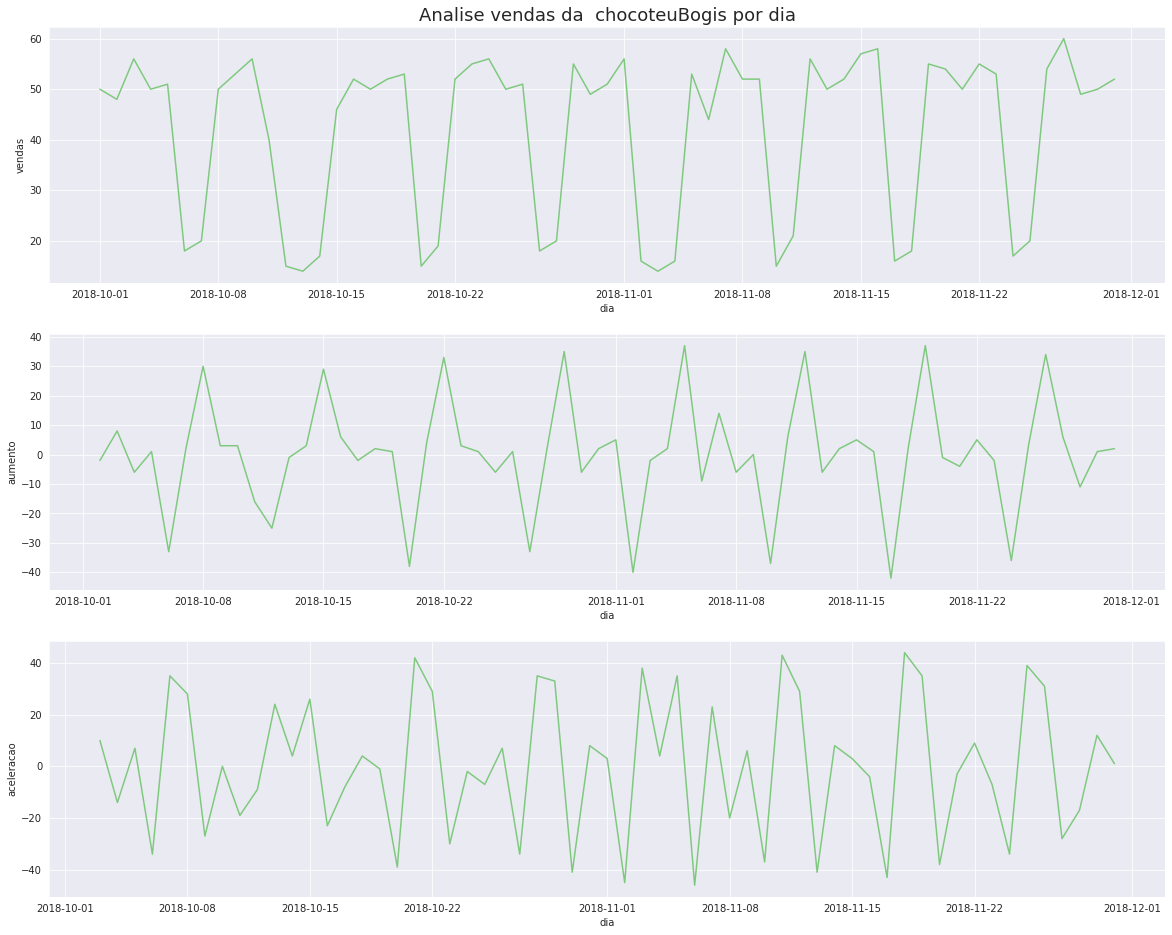

In [41]:
plot_comparacao('dia','vendas','aumento','aceleracao',vendas_por_dia,"Analise vendas da  chocoteuBogis por dia")

##Analisando a sazionalidade

In [0]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia ['dia'].dt.day_name()

In [43]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [0]:
dias_traduzidos = {'Monday': 'Segunda', 'Tuesday' : 'Terça', 'Wednesday':'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sábado', 'Sunday':'Domingo'}



In [45]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head (14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terça
9,2018-10-10,56,3.0,0.0,Quarta


In [46]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [47]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


##Correlação

###Vendas

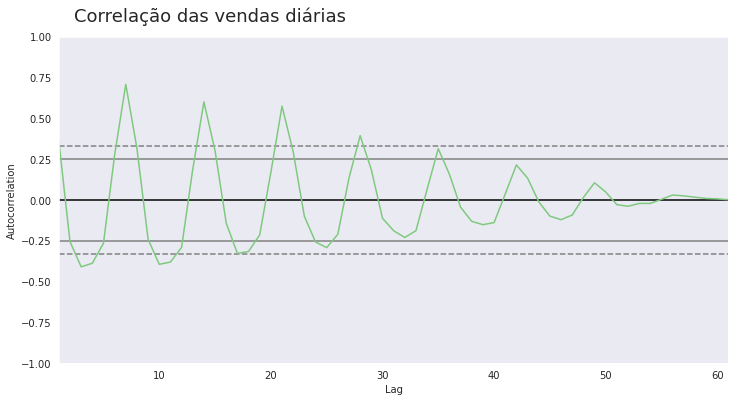

In [48]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

###Aumento

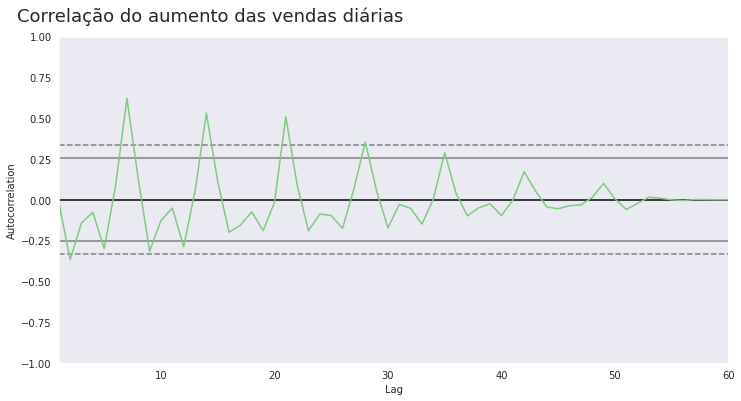

In [49]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

###Aceleração

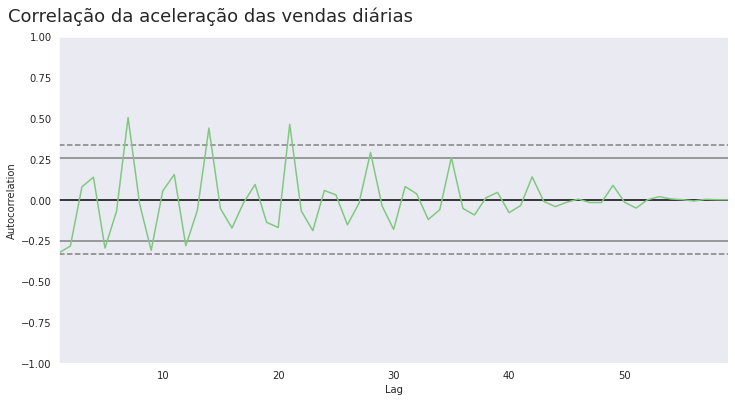

In [50]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

#CaféTec


In [51]:
cafetec= pd.read_csv(path+'cafelura.csv',sep=',')
cafetec.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [0]:
cafetec['mes']= pd.to_datetime(cafetec['mes'])

In [53]:
print('Quantidade de linhas e colunas:', cafetec.shape)
print('1''Quantidade de dados nulos:', cafetec.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
1Quantidade de dados nulos: 0


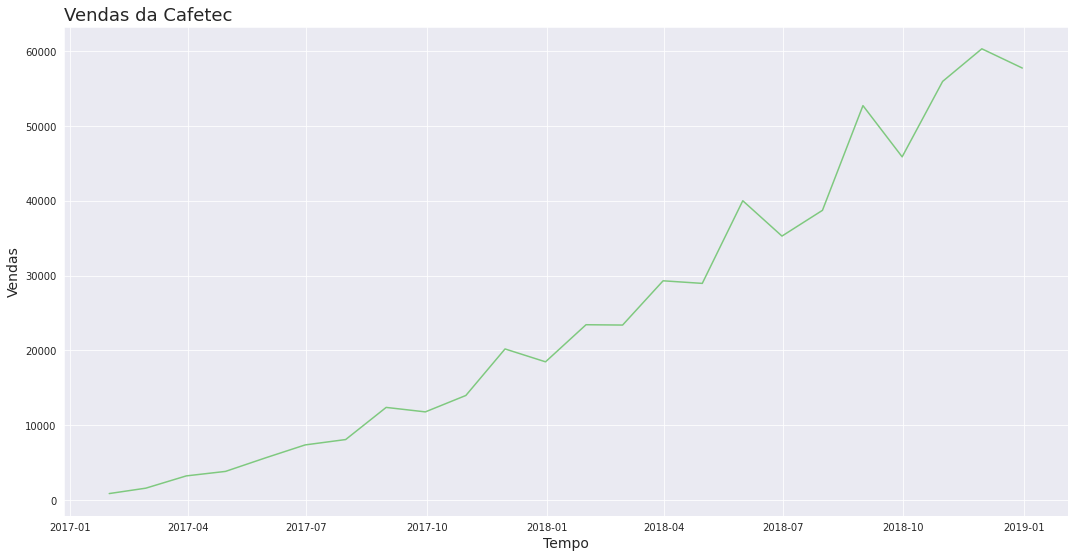

In [54]:
plotar('Vendas da Cafetec', 'Tempo', 'Vendas', 'mes', 'vendas', cafetec)

###Normalização da base de dados


In [55]:
qtd_dias_fds = pd.read_csv(path+'dias_final_de_semana.csv')
qtd_dias_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [56]:
qtd_dias_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [0]:
cafetec['vendas-normalizadas'] = cafetec['vendas']/qtd_dias_fds['quantidade_de_dias'].values

In [58]:
cafetec.head()

,mes,vendas,vendas-normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


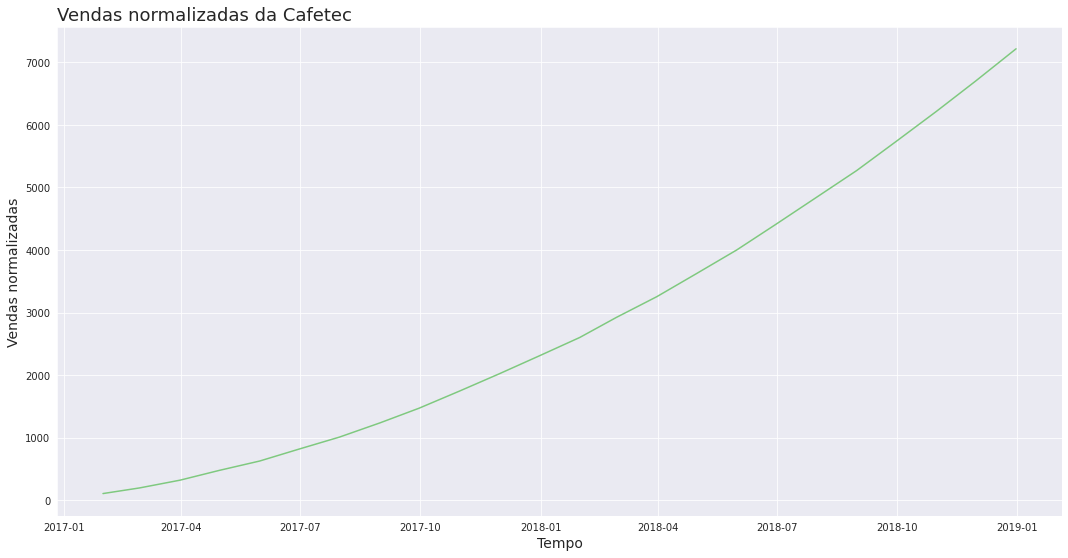

In [59]:
plotar('Vendas normalizadas da Cafetec', 'Tempo', 'Vendas normalizadas', 'mes', 'vendas-normalizadas', cafetec)

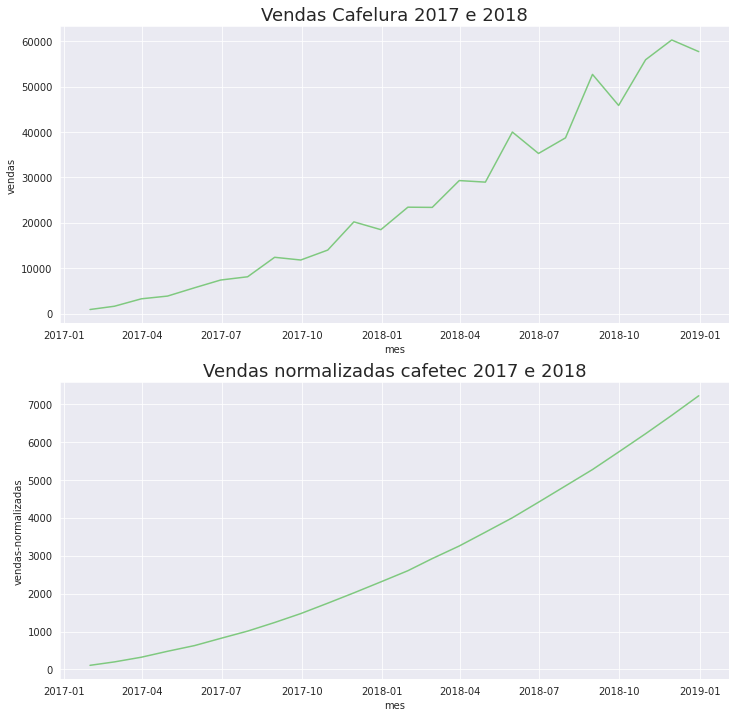

In [60]:
plt.figure(figsize=(12,12))
ax=plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafetec)
ax=plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas cafetec 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas-normalizadas', data=cafetec)
ax=ax 

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

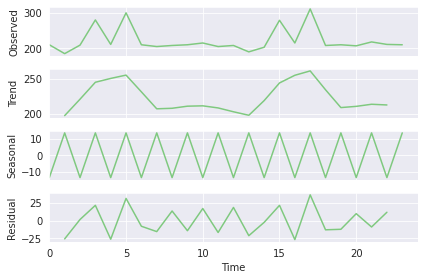

In [62]:
resultado = seasonal_decompose([choco['vendas']], freq=2)
ax = resultado.plot()

In [0]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [64]:
data = ({
       'observacao':observacao,
       'tendencia':tendencia, 
       'sazonalidade':sazonalidade,
       'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,-13.386364,NaN
1,185,197.25,13.386364,-25.636364
2,209,220.75,-13.386364,1.636364
3,280,245.00,13.386364,21.613636
4,211,250.50,-13.386364,-26.113636


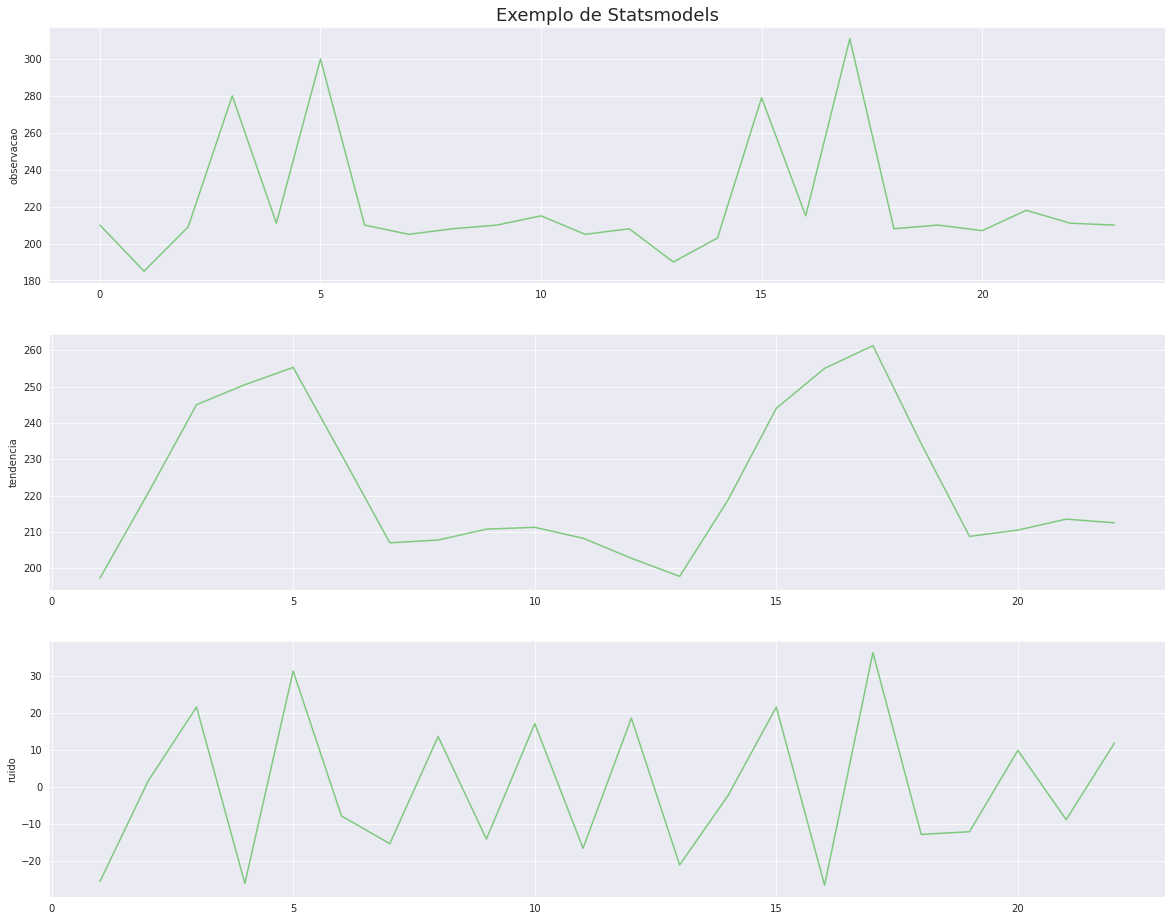

In [65]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'ruido', resultado, 'Exemplo de Statsmodels')

#Cellphone

In [66]:
cellphone = pd.read_csv(path+'alucel.csv')
cellphone.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [67]:
cellphone['dia'] = pd.to_datetime(cellphone['dia'])
cellphone.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [68]:
print('Quantidade de linhas e colunas:', cellphone.shape)
print('Quantidade de dados nulos:', cellphone.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [0]:
cellphone ['aumento'] = cellphone ['vendas'].diff()
cellphone ['aceleracao'] = cellphone ['aumento'].diff()

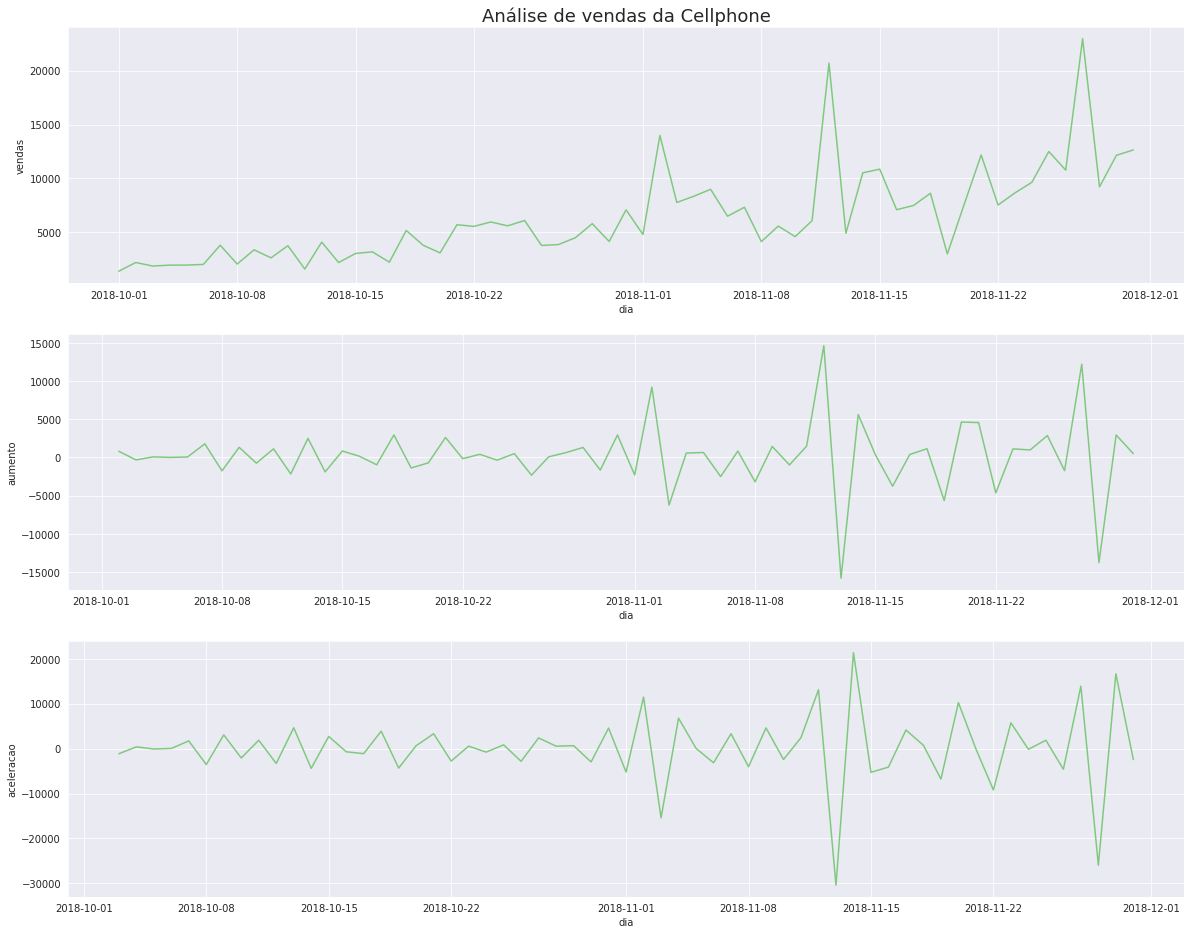

In [70]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', cellphone, 'Análise de vendas da Cellphone')

##Média Móvel##

In [0]:
cellphone['media_movel'] = cellphone['vendas'].rolling(7).mean()

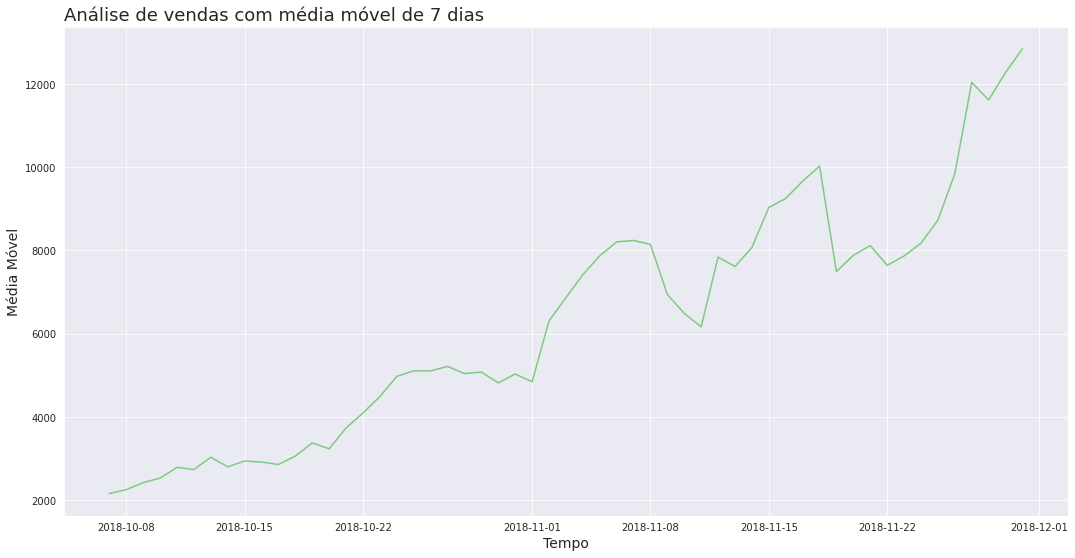

In [73]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', cellphone)

In [74]:
cellphone.head()

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN


In [75]:
cellphone.head(10)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571


In [0]:
cellphone['media_movel_30dias'] = cellphone['vendas'].rolling(30).mean()

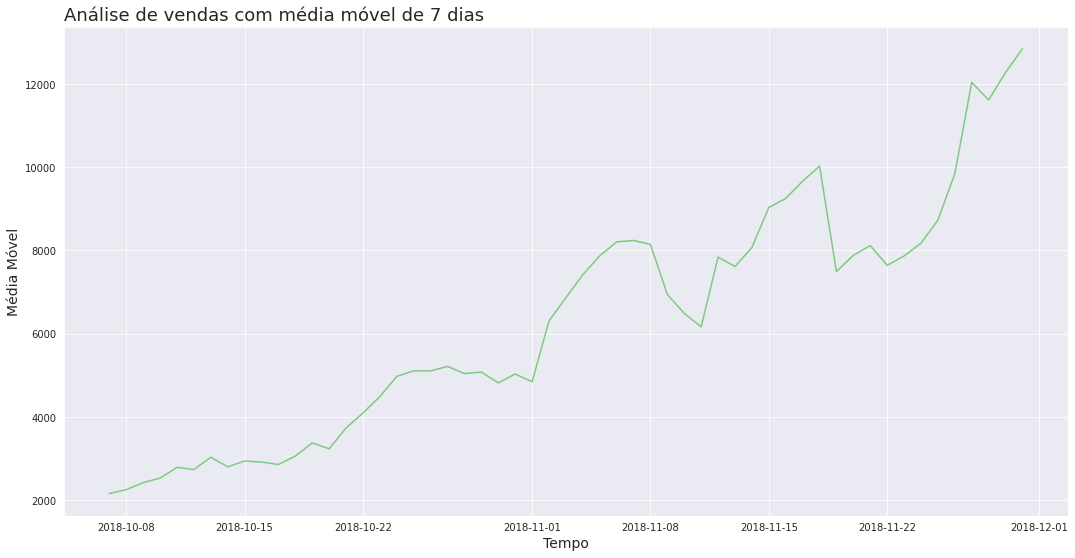

In [80]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', cellphone)

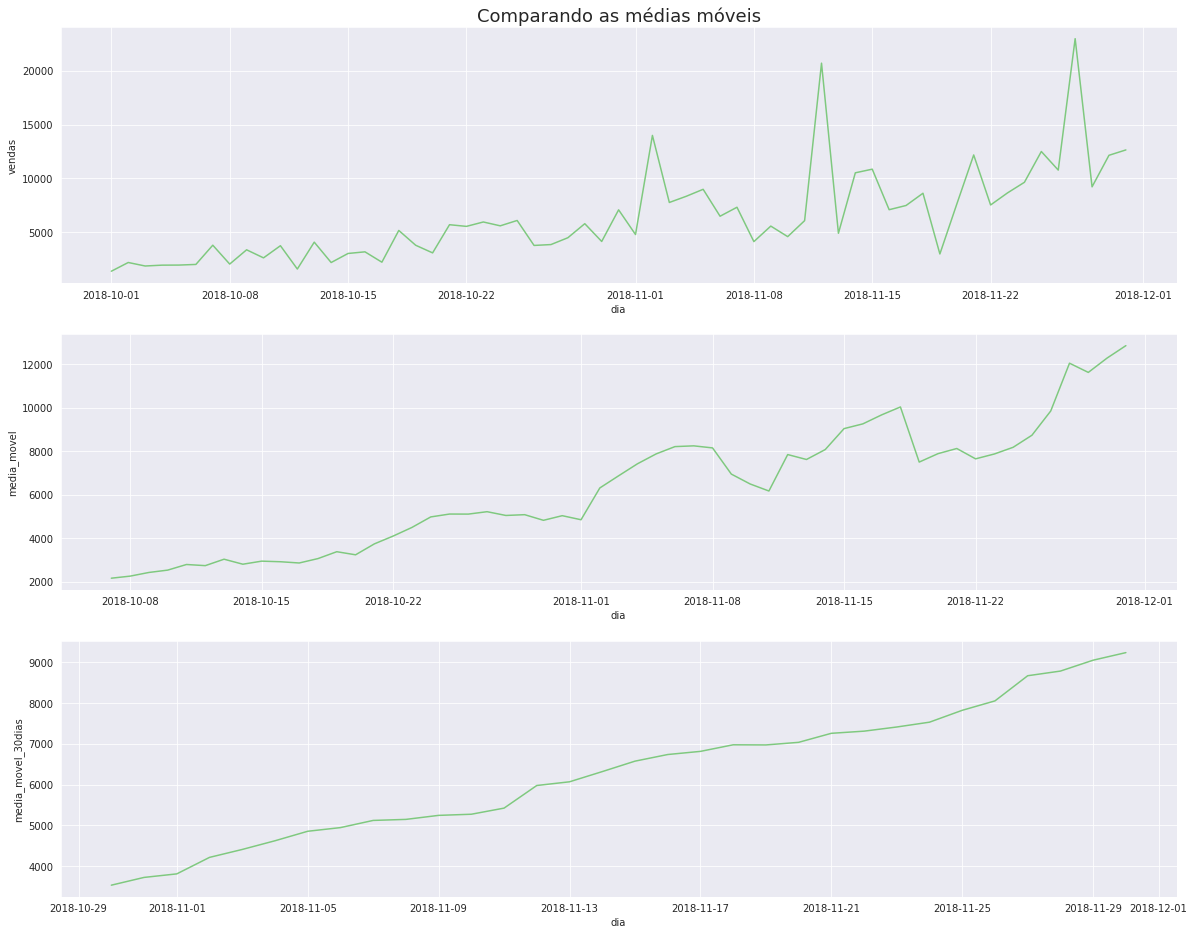

In [82]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_30dias', cellphone, 'Comparando as médias móveis')